In [4]:
import pandas as pd
df = pd.read_csv("inputData/shop_1.txt",sep=";",header=None)
df.columns = ["id","name","price","count","date"]

In [5]:
df.head()

,id,name,price,count,date
0,1,钢笔,105.0,7,2018-7-20 10:45:09
1,2,钢笔,15.0,1,2018-7-1 20:59:17
2,3,圆珠笔,12.0,6,2018-7-29 07:51:50
3,4,钢笔,225.0,15,2018-8-30 06:05:20
4,5,足球,960.0,12,2018-9-29 07:59:21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
id       1000 non-null int64
name     1000 non-null object
price    1000 non-null float64
count    1000 non-null int64
date     1000 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 39.1+ KB


In [8]:
raw_df = spark.read.format("csv").option("delimiter","\t").option("header","false").\
option("inferschema","true").load("inputData/top250_f1.txt")

In [9]:
raw_df.orderBy("_c8",ascending=0).show(5)

+---+-------+--------------------+--------------------+----+---+---------------+---+-------+---------------+--------------------+----+
|_c0|    _c1|                 _c2|                 _c3| _c4|_c5|            _c6|_c7|    _c8|            _c9|                _c10|_c11|
+---+-------+--------------------+--------------------+----+---+---------------+---+-------+---------------+--------------------+----+
|  1| 肖申克的救赎|弗兰克·德拉邦特 Frank Da...| 蒂姆·罗宾斯 Tim Robbins |1994| 美国|      ['犯罪 剧情']|9.6|1151286|        希望让人自由。|https://movie.dou...|null|
|  3|这个杀手不太冷|    吕克·贝松 Luc Besson|     让·雷诺 Jean Reno |1994| 法国|   ['剧情 动作 犯罪']|9.4|1063161|怪蜀黍和小萝莉不得不说的故事。|https://movie.dou...|null|
|  9|   盗梦空间|克里斯托弗·诺兰 Christop...|  莱昂纳多·迪卡普里奥 Le...']|2010| 美国|['剧情 科幻 悬疑 冒险']|9.3| 930867|诺兰给了我们一场无法盗取的梦。|https://movie.dou...|null|
|  4|   阿甘正传|     Robert Zemeckis|          Tom Hanks |1994| 美国|      ['剧情 爱情']|9.4| 908843|      一部美国近现代史。|https://movie.dou...|null|
|  6|  泰坦尼克号|詹姆斯·卡梅隆 James Cam...|莱昂纳多·迪卡普里奥 Leonar...|

In [10]:
raw_df.filter(raw_df["_c4"]>=2013).groupby("_c5").agg({"_c0":"count"}).orderBy("count(_c0)",ascending=0).show(5)

+---+----------+
|_c5|count(_c0)|
+---+----------+
| 美国|        15|
| 韩国|         4|
| 日本|         4|
| 中国|         2|
| 英国|         2|
+---+----------+
only showing top 5 rows



In [11]:
df = raw_df.withColumn("score",raw_df["_c7"]*raw_df["_c8"])

In [12]:
from pyspark.sql.functions import udf

In [13]:
def filterGender(x):
    if(u"剧情" in x and u"爱情" in x):
        return x
    else:
        return u'null'
filterGender = udf(filterGender)

In [14]:
df.orderBy("score",ascending=0).filter(filterGender(raw_df["_c6"])!="null").show(10)

+---+-------+--------------------+--------------------+----+---+---------------+---+------+--------------------+--------------------+----+------------------+
|_c0|    _c1|                 _c2|                 _c3| _c4|_c5|            _c6|_c7|   _c8|                 _c9|                _c10|_c11|             score|
+---+-------+--------------------+--------------------+----+---+---------------+---+------+--------------------+--------------------+----+------------------+
|  4|   阿甘正传|     Robert Zemeckis|          Tom Hanks |1994| 美国|      ['剧情 爱情']|9.4|908843|           一部美国近现代史。|https://movie.dou...|null| 8543124.200000001|
|  2|   霸王别姬|      陈凯歌 Kaige Chen|  张国荣 Leslie Cheung |1993| 中国|   ['剧情 爱情 同性']|9.6|840607|               风华绝代。|https://movie.dou...|null| 8069827.199999999|
|  6|  泰坦尼克号|詹姆斯·卡梅隆 James Cam...|莱昂纳多·迪卡普里奥 Leonar...|1997| 美国|   ['剧情 爱情 灾难']|9.3|844481|          失去的才是永恒的。 |https://movie.dou...|null| 7853673.300000001|
| 12|三傻大闹宝莱坞|拉库马·希拉尼 Rajkumar ...|   阿米尔·汗 Aamir Kha

In [1]:
import pandas as pd

In [4]:
weather_df = pd.read_csv("inputData/weather.txt",sep="\t",header=None)

In [3]:
weather_df.columns = ["日期","天气情况","最大温度","最小温度","风力方向"]

In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 5 columns):
日期      1003 non-null object
天气情况    1003 non-null object
最大温度    1003 non-null int64
最小温度    1003 non-null int64
风力方向    1003 non-null object
dtypes: int64(2), object(3)
memory usage: 39.3+ KB


In [5]:
weather_df.head()

,日期,天气情况,最大温度,最小温度,风力方向
0,2016-1-1,晴,22,12,无持续风向≤3级
1,2016-1-2,多云,22,16,无持续风向≤3级
2,2016-1-3,阴,25,18,无持续风向≤3级
3,2016-1-4,小雨,24,18,无持续风向≤3级
4,2016-1-5,中雨,22,16,无持续风向≤3级


In [5]:
def selecttime(x):
    if(x[:6]=="2018-9"):
        return x
    else:
        return "9999"

In [6]:
weather_df["日期"]  = weather_df["日期"].apply(lambda x:selecttime(x))

In [7]:
weather_df = weather_df.loc[weather_df["日期"]!="9999"]

In [9]:
weather_df.set_index(weather_df["日期"]).head()

,日期,天气情况,最大温度,最小温度,风力方向
日期,,,,,
2018-9-1,2018-9-1,暴雨,29,24,无持续风向1-2级
2018-9-2,2018-9-2,雷阵雨,30,24,无持续风向1-2级
2018-9-3,2018-9-3,雷阵雨,32,26,无持续风向1-2级
2018-9-4,2018-9-4,多云,34,26,无持续风向1-2级
2018-9-5,2018-9-5,雷阵雨,35,26,无持续风向1-2级


In [10]:
import matplotlib.pyplot as plt

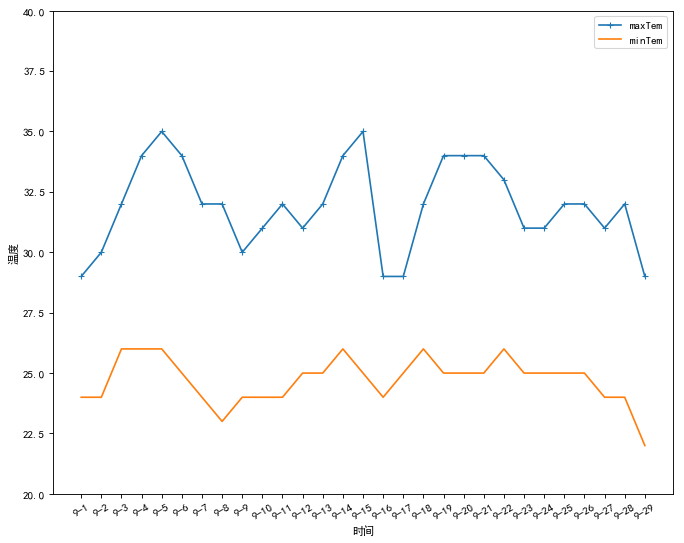

In [11]:
fig,ax = plt.subplots(figsize=(10,8),dpi=80)
lst = [i for i in range(1,30)]
plt.rcParams['font.sans-serif']=['SimHei']
ax.plot(weather_df["日期"].str.slice(5,10),weather_df["最大温度"],label="maxTem",marker="+")
ax.plot(weather_df["日期"].str.slice(5,10),weather_df["最小温度"],label="minTem")
ax.set_xlabel("时间")
ax.set_ylim(20,40)
ax.set_ylabel("温度")
plt.xticks(rotation=30)
ax.legend()

[1 4 3 6 4 8 1]
[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776
 0.        ]


(0, 200)

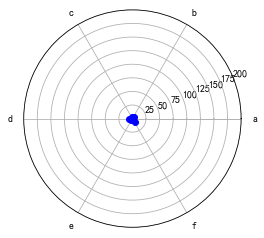

In [33]:
import numpy as np
import matplotlib.pyplot as plt
labels = np.array(['a','b','c','d','e','f']) # 标签
dataLenth = 6 # 数据长度
data = np.array([1,4,3,6,4,8]) # 数据


angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False) # 分割圆周长

data = np.concatenate((data, [data[0]]))
print(data)# 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合
print(angles)
plt.polar(angles, data, 'bo-', linewidth=2) #做极坐标系
plt.thetagrids(angles * 180/np.pi, labels) # 做标签
plt.fill(angles, data, facecolor='r', alpha=0.25)# 填充
plt.ylim(0,200)

In [5]:
weather_df.head()

,0,1,2,3,4
0,2016-1-1,晴,22,12,无持续风向≤3级
1,2016-1-2,多云,22,16,无持续风向≤3级
2,2016-1-3,阴,25,18,无持续风向≤3级
3,2016-1-4,小雨,24,18,无持续风向≤3级
4,2016-1-5,中雨,22,16,无持续风向≤3级


In [6]:
weather_df1 = pd.read_csv("inputData/weather.txt",sep="\t",header=None)

In [7]:
weather_df1.columns = ["日期","天气情况","最大温度","最小温度","风力方向"]

In [14]:
weather_df1.head()

,日期,天气情况,最大温度,最小温度,风力方向
0,2016-1-1,晴,22,12,无持续风向≤3级
1,2016-1-2,多云,22,16,无持续风向≤3级
2,2016-1-3,阴,25,18,无持续风向≤3级
3,2016-1-4,小雨,24,18,无持续风向≤3级
4,2016-1-5,中雨,22,16,无持续风向≤3级


In [8]:
weather_df1["日期"] = weather_df1["日期"].str.slice(0,4)

In [9]:
weather_df1.head()

,日期,天气情况,最大温度,最小温度,风力方向
0,2016,晴,22,12,无持续风向≤3级
1,2016,多云,22,16,无持续风向≤3级
2,2016,阴,25,18,无持续风向≤3级
3,2016,小雨,24,18,无持续风向≤3级
4,2016,中雨,22,16,无持续风向≤3级


In [10]:
df1 = weather_df1.loc[weather_df1["日期"]=="2016"]

In [11]:
df1.head()

,日期,天气情况,最大温度,最小温度,风力方向
0,2016,晴,22,12,无持续风向≤3级
1,2016,多云,22,16,无持续风向≤3级
2,2016,阴,25,18,无持续风向≤3级
3,2016,小雨,24,18,无持续风向≤3级
4,2016,中雨,22,16,无持续风向≤3级


In [12]:
rst1 = pd.value_counts(df1["天气情况"])
rst1

多云      140
小雨       62
阴        28
小到中雨     27
晴        26
中雨       23
中到大雨     21
大雨       10
大到暴雨     10
阵雨        9
雷阵雨       8
雾         1
暴雨        1
Name: 天气情况, dtype: int64

In [14]:
rst2 = weather_df1.loc[weather_df1["日期"]=="2017"].天气情况.value_counts()

In [15]:
rst1df = rst1.to_frame().loc[["多云","雷阵雨","小雨","晴","阴","中雨"]]

In [16]:
rst2df = rst2.to_frame().loc[["多云","雷阵雨","小雨","晴","阴","中雨"]]

In [18]:
rstdf = pd.concat([rst1df,rst2df],axis=1)
rstdf.head()

,天气情况,天气情况
多云,140,114
雷阵雨,8,58
小雨,62,45
晴,26,55
阴,28,25


In [73]:
rstdf.iloc[:,:1]["天气情况"].values

array([140,   8,  62,  26,  28,  23], dtype=int64)

D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


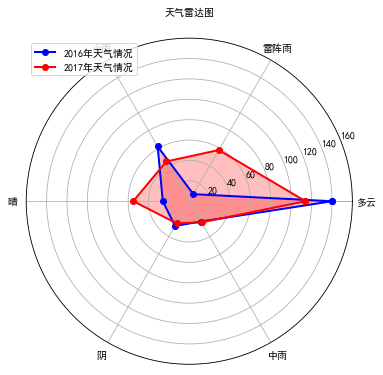

In [88]:
'''
matplotlib雷达图
'''
import numpy as np
import matplotlib.pyplot as plt

#=======自己设置开始============
#标签
labels = rstdf.index
#数据个数
dataLenth = 6
#数据
data1 = rstdf.iloc[:,:1]["天气情况"].values
data2 = rstdf.iloc[:,1:2]["天气情况"].values


data1 = np.concatenate((data1, [data1[0]]))
data2 = np.concatenate((data2, [data2[0]]))
#========自己设置结束============

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) # 闭合

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, polar=True)# polar参数！！
ax.plot(angles, data1, 'bo-', linewidth=2,label="2016年天气情况")# 画线
ax.fill(angles, data1, facecolor='r', alpha=0.25)# 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")


ax = fig.add_subplot(111, polar=True)
ax.plot(angles, data2, 'bo-', linewidth=2,color="red",label="2017年天气情况")# 画线
ax.fill(angles, data2,facecolor="r",alpha=0.25)# 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title("天气雷达图", va='bottom', fontproperties="SimHei")
ax.set_rlim(0,160)
plt.legend(loc="upper left")
ax.grid(True)
plt.show()